# Signal Acceptance and Efficiency in the Recoil Tracker #

## Omar Moreno (SLAC National Accelarator Laboratory) ##

### Data ###


In [1]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

# imports
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import root_numpy as rnp

plt.style.use('bmh')
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['legend.numpoints'] = 1

In [2]:
def binomial_error(total, passing) :
    return (1/total)*math.sqrt(passing*(1-passing/total))

In [3]:
# Location of the ROOT ntuple
file_path = '/home/omoreno/work/ldmx/analysis/signal_mc/signal_analysis_ntuple.root'
results_rec = rnp.root2array(file_path)

ap_mass = results_rec['ap_mass']
ap_masses = np.unique(ap_mass)

event = results_rec['event']

is_within_acceptance = results_rec['is_within_acceptance']

recoil_p = results_rec['recoil_p']
recoil_pt = results_rec['recoil_pt']
recoil_px = results_rec['recoil_px']
recoil_py = results_rec['recoil_py']
recoil_pz = results_rec['recoil_pz']

theta = np.abs(np.arctan(np.divide(recoil_py, recoil_pz))*(180/math.pi))

sim_hit_layer = results_rec['sim_hit_layer']
sim_hit_pos_x = results_rec['sim_hit_pos_x']
sim_hit_pos_y = results_rec['sim_hit_pos_y']
sim_hit_pos_z = results_rec['sim_hit_pos_z']
sim_hit_time  = results_rec['sim_hit_time']

## Recoil $e^{-}$ kinematics of signal events

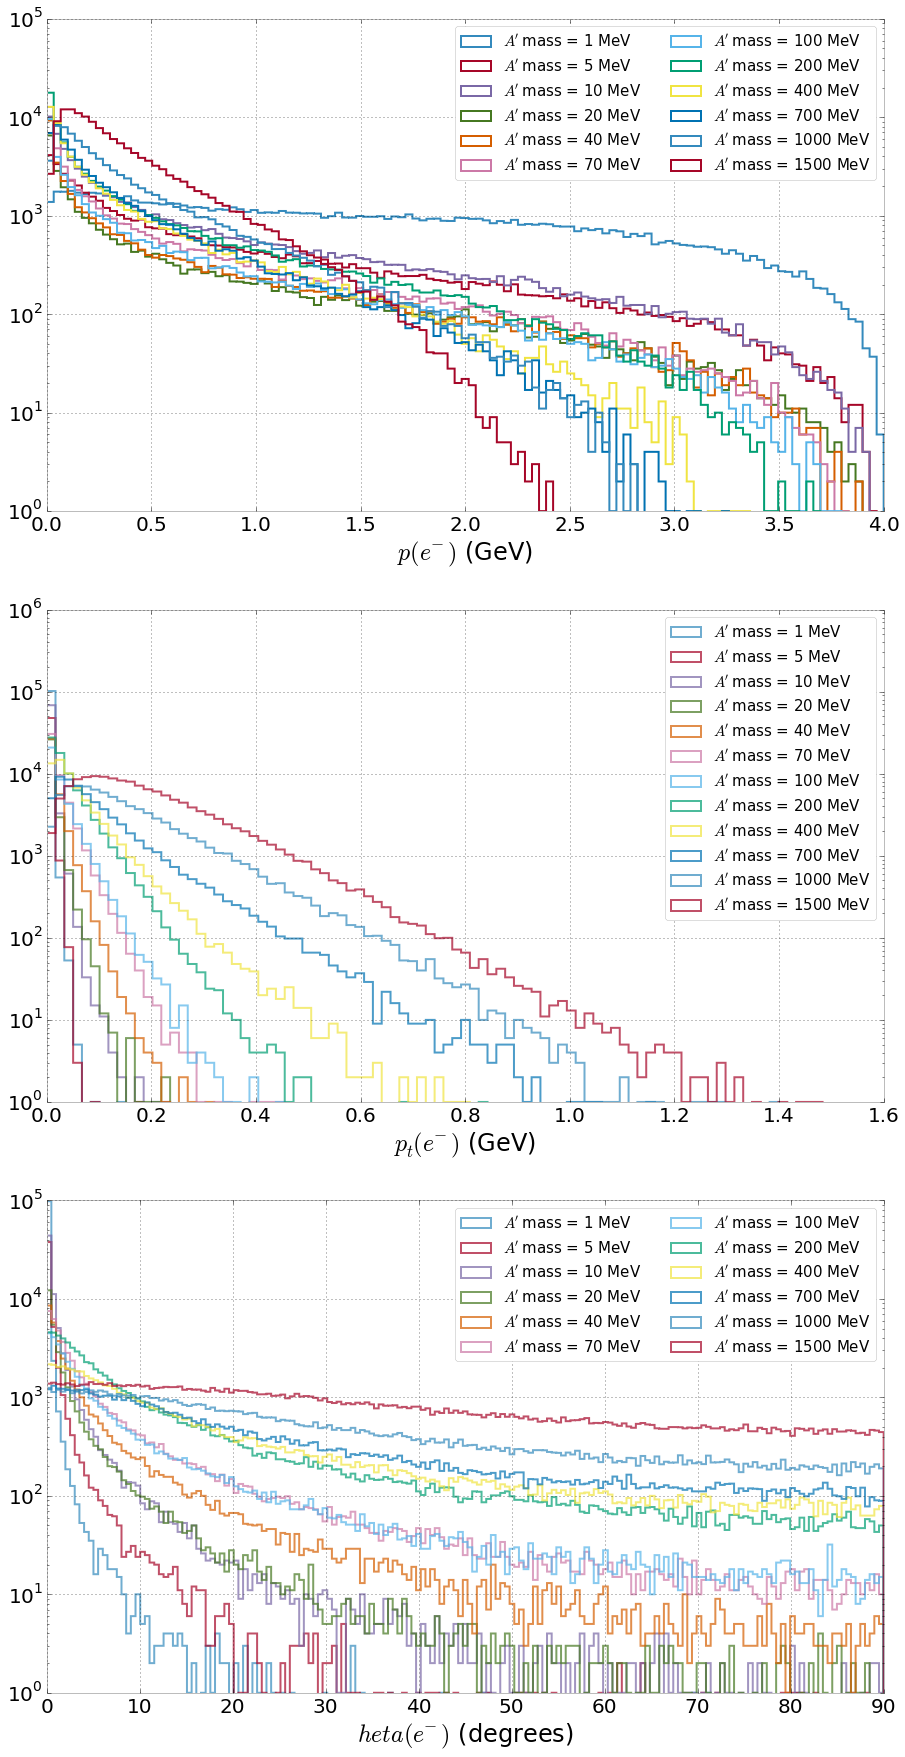

In [4]:
# Create the figure
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(15, 30))

bins_p  = np.linspace(0, 4, 120)
bins_pt = np.linspace(0, 1.5, 90)
bins_theta = np.linspace(0, 90, 180)

for mass in ap_masses : 
    ax0.hist(recoil_p[ap_mass == mass], bins=bins_p, histtype='step', linewidth=2, 
             label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax1.hist(recoil_pt[ap_mass == mass], bins=bins_pt, alpha=0.7, histtype='step', linewidth=2,
             label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    ax2.hist(theta[ap_mass == mass], bins=bins_theta, alpha=0.7, histtype='step', linewidth=2,
             label="$A'$ mass = " + str(int(round(mass*1000, 0))) + " MeV")
    

ax0.set_xlabel("$p(e^{-})$ (GeV)")
ax0.set_yscale("log")
ax0.legend(fontsize=15, ncol=2)

ax1.set_xlabel("$p_{t}(e^{-})$ (GeV)")
ax1.set_yscale("log")
ax1.legend(fontsize=15)

ax2.set_xlabel("$\theta(e^{-})$ (degrees)")
ax2.set_yscale("log")
ax2.legend(fontsize=15, ncol=2);

## Signal Acceptance

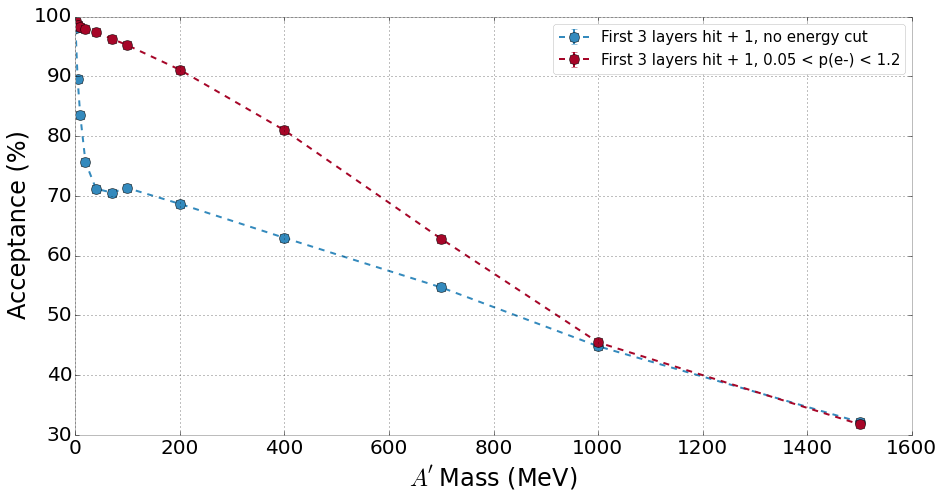

In [5]:
tracker_acceptance_all = []
tracker_acceptance_all_err = []
tracker_acceptance_trigger = []
tracker_acceptance_trigger_err = []

for mass in ap_masses :
    
    acceptance = is_within_acceptance[mass == ap_mass]
    tracker_acceptance_all.append((float(len(acceptance[acceptance == 1]))/float(len(acceptance)))*100)
    tracker_acceptance_all_err.append(binomial_error(len(acceptance), len(acceptance[acceptance == 1]))*100)
    
    acceptance = acceptance[(recoil_p[mass == ap_mass] < 1.2) & (recoil_p[mass == ap_mass] > 0.05)]
    tracker_acceptance_trigger.append((float(len(acceptance[acceptance == 1]))/float(len(acceptance)))*100)
    tracker_acceptance_trigger_err.append(binomial_error(len(acceptance), len(acceptance[acceptance == 1]))*100)
    
# Create the figure
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 7.5))

ax0.errorbar(ap_masses*1000, tracker_acceptance_all, yerr=tracker_acceptance_all_err,
             marker='o', markersize=10, linestyle='--', label='First 3 layers hit + 1, no energy cut')
ax0.errorbar(ap_masses*1000, tracker_acceptance_trigger, yerr=tracker_acceptance_all_err,
             marker='o', markersize=10, linestyle='--', label='First 3 layers hit + 1, 0.05 < p(e-) < 1.2');

ax0.set_ylim(30, 100)
ax0.set_xlabel("$A'$ Mass (MeV)")
ax0.set_ylabel("Acceptance (%)")
ax0.legend(fontsize=15);